In [107]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [108]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [109]:
def add_mask_to_face(image_path, mask_path):
    # load the images
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224)) 
    mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=2.5, minNeighbors=5)
    
    for (x, y, w, h) in faces[0:1]: # taking the first face only (assuming only 1 person)
        
        # Define points for mask placement based on the face rectangle
        # top_left = (x, y + int(h / 4))
        # bottom_right = (x + w, y + int(h * 0.75))
        
        # top_left = (x, y + int(h * 0.55))  # Adjusted the y position downward
        # bottom_right = (x + w, y + int(h * 0.95))  # Adjusted the y position downward

        y_scale_factor = 2.2
        top_left = (x, y + int(h * 0.25))
        bottom_right = (x + w, y + int(h * 0.25) + int((h * 0.95 - h * 0.55) * y_scale_factor))

        
        # Resize mask to fit the face
        mask_resized = cv2.resize(mask, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))
        
        # Extract the region of interest (ROI) from the image
        roi = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

        # Extract the mask's alpha channel and create an inverse alpha mask
        mask_alpha = mask_resized[:, :, 3] / 255.0
        mask_inv_alpha = 1 - mask_alpha

        # Blend the mask with the ROI
        for c in range(0, 3):
            roi[:, :, c] = (mask_alpha * mask_resized[:, :, c] + mask_inv_alpha * roi[:, :, c])
        
        
        image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = roi
    
    return faces, image


In [110]:
os.listdir()

['.ipynb_checkpoints',
 'female1.jpg',
 'female2.jpg',
 'links.txt',
 'male1.jpg',
 'male2.jpg',
 'male3.jpg',
 'mask.png',
 'mask.py',
 'New folder',
 'output_female1_2.jpg',
 'output_female2_2.jpg',
 'output_male1_2.jpg',
 'output_male2_2.jpg',
 'output_male3_2.jpg',
 'Untitled.ipynb']

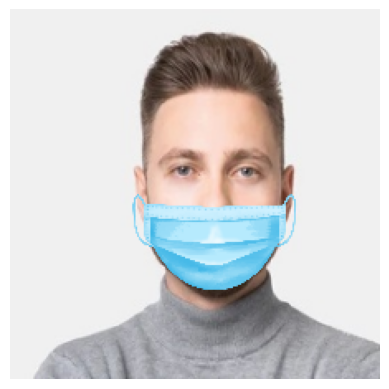

[[ 49  39 150 150]]


In [111]:
pointts, output_image = add_mask_to_face('male1.jpg', 'mask.png')
cv2.imwrite('output_male1_2.jpg', output_image)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(pointts)

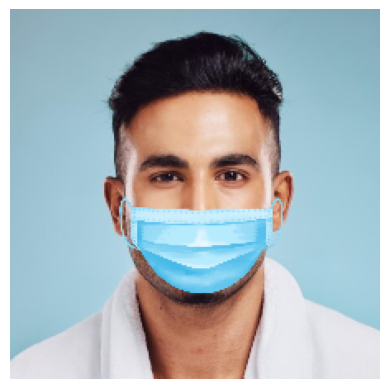

[[ 41  41 150 150]]


In [112]:
pointts, output_image = add_mask_to_face('male2.jpg', 'mask.png')
cv2.imwrite('output_male2_2.jpg', output_image)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(pointts)

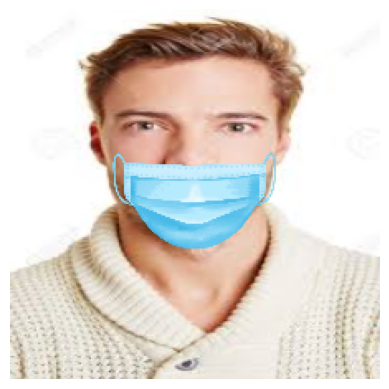

[[ 37  14 150 150]]


In [113]:
pointts, output_image = add_mask_to_face('male3.jpg', 'mask.png')
cv2.imwrite('output_male3_2.jpg', output_image)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(pointts)

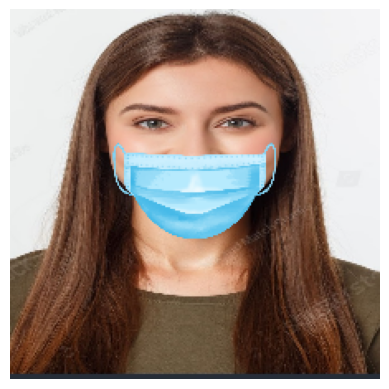

[[ 37   8 150 150]]


In [114]:
pointts, output_image = add_mask_to_face('female1.jpg', 'mask.png')
cv2.imwrite('output_female1_2.jpg', output_image)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(pointts)

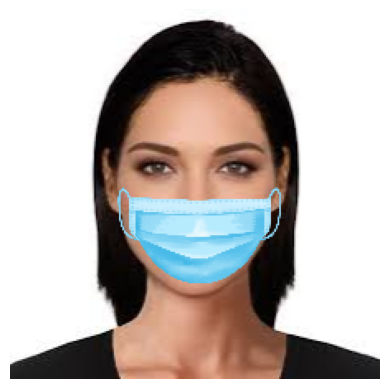

[[ 40  35 150 150]]


In [115]:
pointts, output_image = add_mask_to_face('female2.jpg', 'mask.png')
cv2.imwrite('output_female2_2.jpg', output_image)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(pointts)